In [10]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [11]:
#Data import

df = pd.read_csv(r"C:\Users\Aishwarya\Desktop\Datasets\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
#Describe the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
#Split the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [17]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [18]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Model Building

In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [20]:
lg = LogisticRegression()

In [21]:
lg.fit(xtrain,ytrain)

ypred = lg.predict(xtest)

In [22]:
confusion_matrix(ytest,ypred)

array([[89, 10],
       [24, 31]], dtype=int64)

In [27]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200

sns.set_style('darkgrid')

Text(193.44444444444443, 0.5, 'Actual Values')

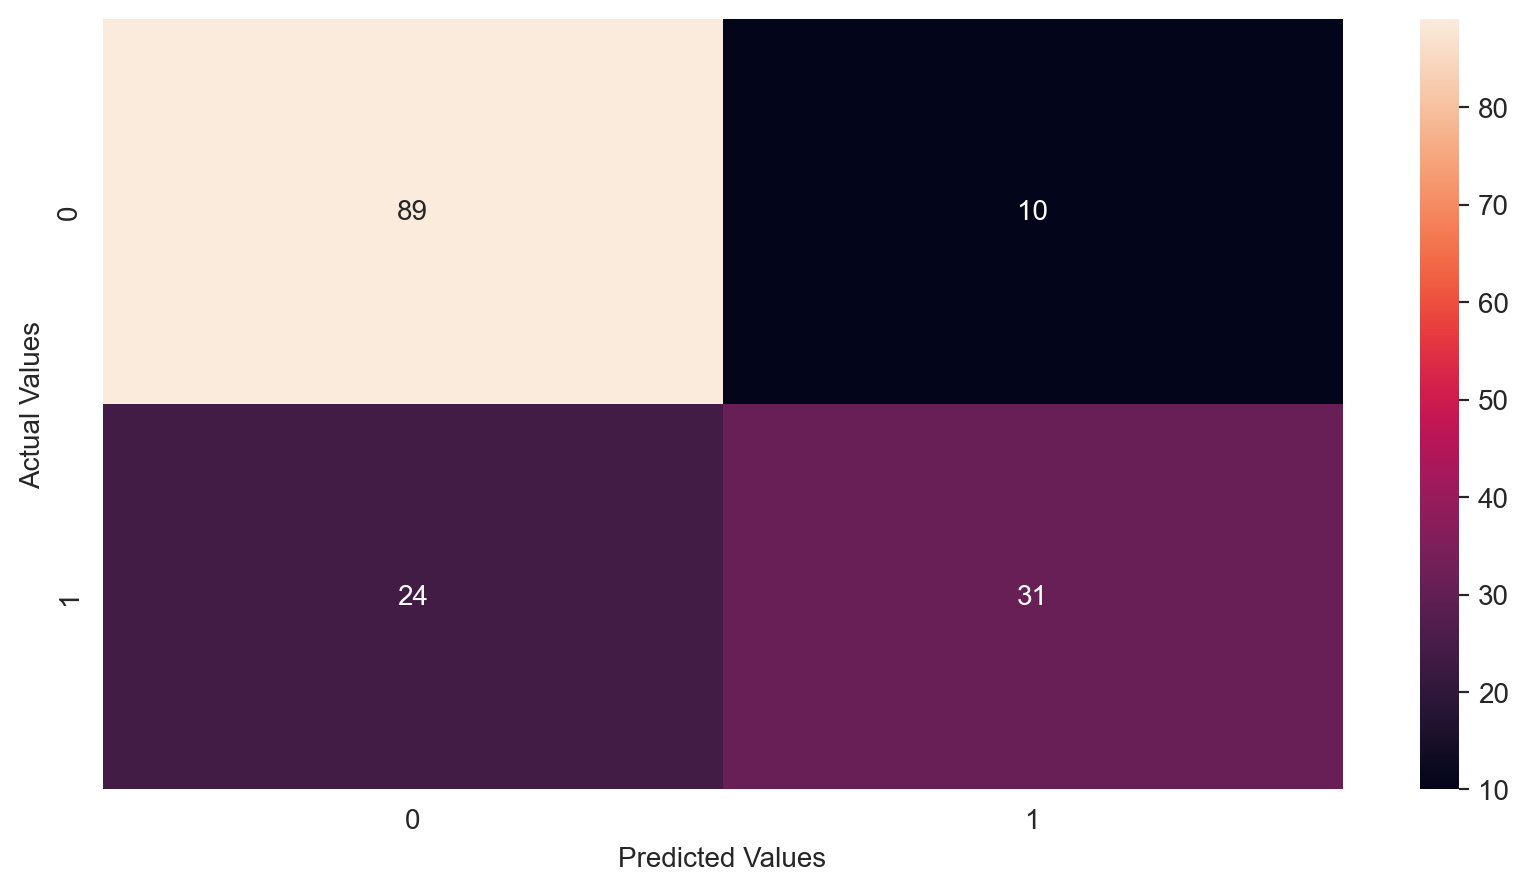

In [28]:
sns.heatmap(confusion_matrix(ytest,ypred), annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [29]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



In [5]:
#compare the prediction of the model

In [30]:
print(ytest[:30].values)
print(ypred[:30])

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1]


In [6]:
#Select the probability of records being the class 1

In [32]:
ytest

285    0
101    0
581    0
352    0
726    0
      ..
563    0
318    0
154    1
684    0
643    0
Name: Outcome, Length: 154, dtype: int64

In [33]:
proba = lg.predict_proba(xtest)[:,1]

proba

array([0.4525003 , 0.31273458, 0.15063155, 0.03981934, 0.20004857,
       0.24996917, 0.36382479, 0.10070522, 0.13384543, 0.1679335 ,
       0.45270112, 0.0750774 , 0.99111823, 0.75213087, 0.05271067,
       0.74517402, 0.22421737, 0.31156364, 0.11814672, 0.16703088,
       0.44699589, 0.17768742, 0.96868854, 0.26450766, 0.06785126,
       0.3747011 , 0.17347246, 0.80868162, 0.08442912, 0.57969826,
       0.43040914, 0.33382125, 0.06066439, 0.6618345 , 0.13929027,
       0.60023829, 0.09989085, 0.19115836, 0.09751189, 0.5876139 ,
       0.1989684 , 0.08279894, 0.0393773 , 0.35623556, 0.07725967,
       0.02226578, 0.71431644, 0.83024159, 0.08102887, 0.12656897,
       0.00863145, 0.2080832 , 0.87650432, 0.04740481, 0.78236883,
       0.10617044, 0.62410021, 0.34216432, 0.54135523, 0.13534589,
       0.62319285, 0.01491133, 0.72449439, 0.18729713, 0.33070357,
       0.10124343, 0.01033961, 0.2918393 , 0.7241249 , 0.65272501,
       0.882898  , 0.71666728, 0.62730026, 0.01578168, 0.71076

In [7]:
#plot the roc auc curve for prediction and proabilities

In [38]:
auc

0.8442607897153351

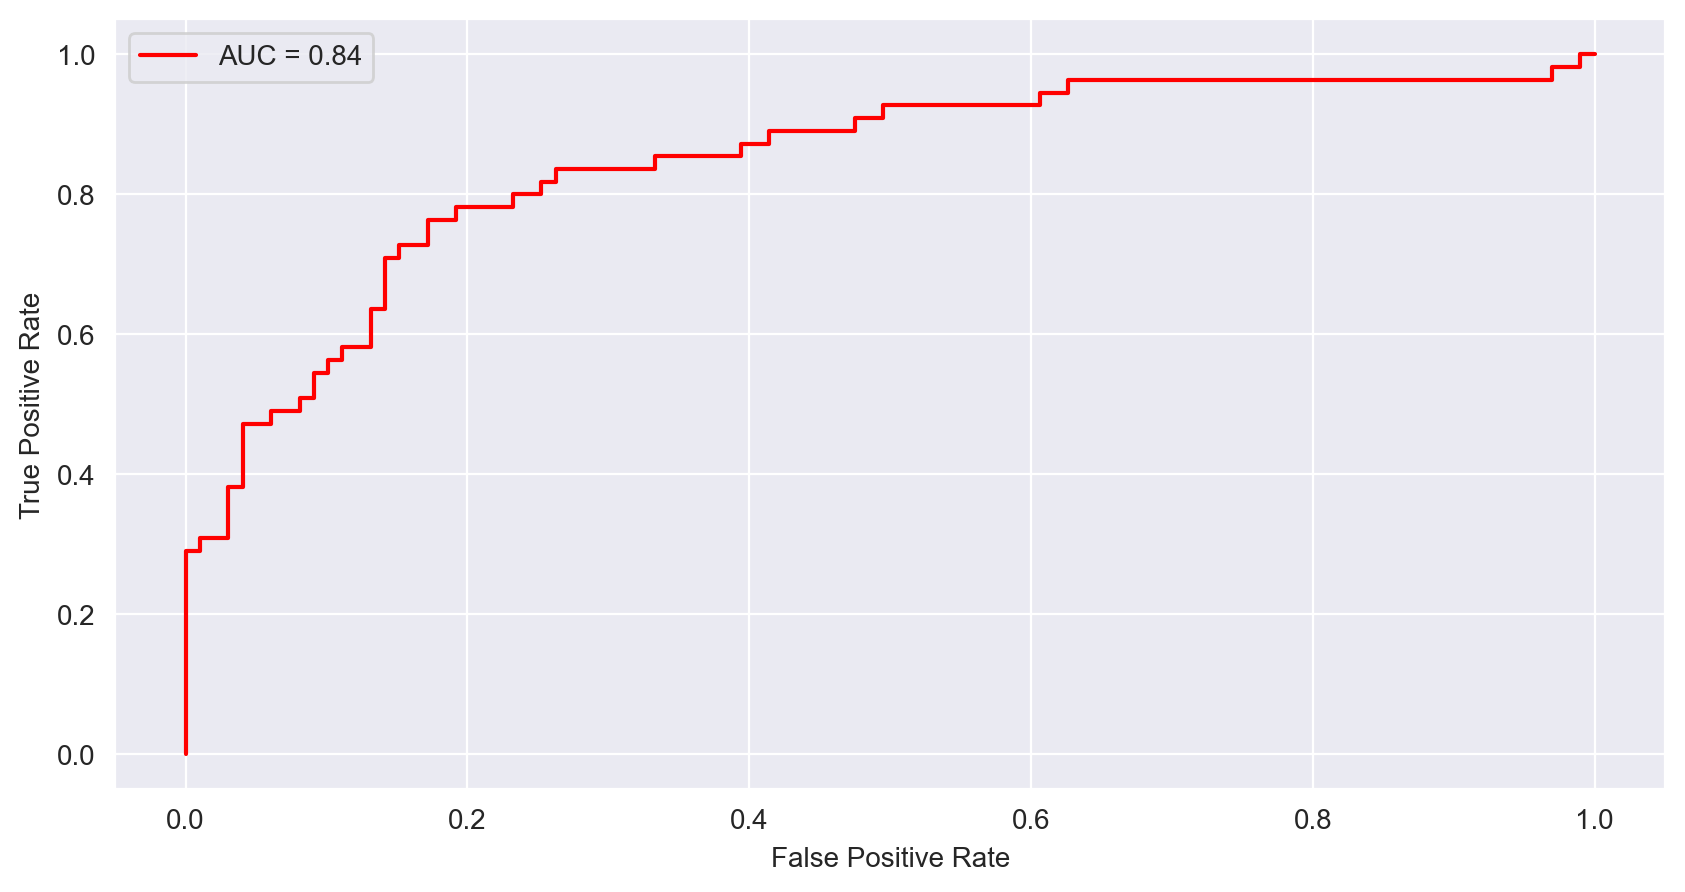

In [37]:
auc = roc_auc_score(ytest,proba)

fpr,tpr, threshold = roc_curve(ytest,proba)

plt.plot(fpr, tpr,color = 'red', label = 'AUC = %0.2f'%auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Select the best threshold value for the model.

In [39]:
#Threshold values
threshold

array([1.99111823, 0.99111823, 0.74517402, 0.73209363, 0.72449439,
       0.71666728, 0.69948453, 0.68785515, 0.63391512, 0.62730026,
       0.62410021, 0.60182384, 0.60023829, 0.5876139 , 0.57969826,
       0.54135523, 0.52466138, 0.49506372, 0.46962849, 0.4525003 ,
       0.4209736 , 0.41872734, 0.39473945, 0.3747011 , 0.37340957,
       0.36075731, 0.34699155, 0.33382125, 0.33070357, 0.30609531,
       0.30253814, 0.29253859, 0.2918393 , 0.29175672, 0.28944064,
       0.26478432, 0.26450766, 0.22849951, 0.22421737, 0.22282305,
       0.21009617, 0.18729713, 0.17768742, 0.17583242, 0.17471939,
       0.13457159, 0.13421274, 0.12914464, 0.12656897, 0.02226578,
       0.01780425, 0.01491133, 0.01033961, 0.00863145])

In [44]:
accuracy = []

for i in threshold:
    ypred = np.where(proba>i,1,0)
    accuracy.append(accuracy_score(ytest,ypred))
    
thrshold_selection = pd.concat([pd.Series(accuracy),pd.Series(threshold)], axis = 1)
thrshold_selection.columns = ['Accuracy','Threshold']
thrshold_selection.sort_values(by = 'Accuracy', ascending=False)

,Accuracy,Threshold
23,0.805195,0.374701
27,0.798701,0.333821
22,0.798701,0.394739
26,0.798701,0.346992
25,0.798701,0.360757
24,0.798701,0.373410
28,0.792208,0.330704
21,0.785714,0.418727
8,0.779221,0.633915
15,0.779221,0.541355


In [48]:
from sklearn.preprocessing import binarize

final_y = binarize([proba], threshold=0.37)[0]

In [9]:
#Check the accuracy for the model with selected threshold

In [49]:
print(classification_report(ytest,final_y))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        99
           1       0.73      0.73      0.73        55

    accuracy                           0.81       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.81      0.81      0.81       154

